In [86]:
import duckdb
from pathlib import Path

duckdb_path = "new.duckdb"
Path(duckdb_path).unlink(missing_ok=True)

with duckdb.connect(duckdb_path) as conn, open("load_sakila.sql") as ingest:
    conn.sql(ingest.read())

    desc = conn.sql("DESC;").df()
    films = conn.sql("FROM film;").df()

films.head(3)

,film_id,title,description,release_year,language_id,original_language_id,rental_duration,rental_rate,length,replacement_cost,rating,special_features,last_update
0,1,ACADEMY DINOSAUR,A Epic Drama of a Feminist And a Mad Scientist...,2006,1,<NA>,6,0.99,86,20.99,PG,"Deleted Scenes,Behind the Scenes",2021-03-06 15:52:00
1,2,ACE GOLDFINGER,A Astounding Epistle of a Database Administrat...,2006,1,<NA>,3,4.99,48,12.99,G,"Trailers,Deleted Scenes",2021-03-06 15:52:00
2,3,ADAPTATION HOLES,A Astounding Reflection of a Lumberjack And a ...,2006,1,<NA>,7,2.99,50,18.99,NC-17,"Trailers,Deleted Scenes",2021-03-06 15:52:00


In [59]:
desc

,database,schema,name,column_names,column_types,temporary
0,new,main,actor,"[actor_id, first_name, last_name, last_update]","[DOUBLE, VARCHAR, VARCHAR, TIMESTAMP]",False
1,new,main,address,"[address_id, address, address2, district, city...","[BIGINT, VARCHAR, VARCHAR, VARCHAR, BIGINT, VA...",False
2,new,main,category,"[category_id, name, last_update]","[BIGINT, VARCHAR, TIMESTAMP]",False
3,new,main,city,"[city_id, city, country_id, last_update]","[BIGINT, VARCHAR, BIGINT, TIMESTAMP]",False
4,new,main,country,"[country_id, country, last_update]","[BIGINT, VARCHAR, TIMESTAMP]",False
5,new,main,customer,"[customer_id, store_id, first_name, last_name,...","[BIGINT, BIGINT, VARCHAR, VARCHAR, VARCHAR, BI...",False
6,new,main,customer_list,"[ID, name, address, zip_code, phone, city, cou...","[BIGINT, VARCHAR, VARCHAR, VARCHAR, VARCHAR, V...",False
7,new,main,film,"[film_id, title, description, release_year, la...","[BIGINT, VARCHAR, VARCHAR, VARCHAR, BIGINT, BI...",False
8,new,main,film_actor,"[actor_id, film_id, last_update]","[BIGINT, BIGINT, TIMESTAMP]",False
9,new,main,film_category,"[film_id, category_id, last_update]","[BIGINT, BIGINT, TIMESTAMP]",False


In [89]:
df = {}

with duckdb.connect(duckdb_path) as conn:
    for name in desc["name"]:
        df[name] = conn.sql(f"FROM {name};").df()

df.keys()

dict_keys(['actor', 'address', 'category', 'city', 'country', 'customer', 'customer_list', 'film', 'film_actor', 'film_category', 'film_list', 'film_text', 'inventory', 'language', 'payment', 'rental', 'sales_by_film_category', 'sales_by_store', 'staff', 'staff_list', 'store'])

In [90]:
df['film']



,film_id,title,description,release_year,language_id,original_language_id,rental_duration,rental_rate,length,replacement_cost,rating,special_features,last_update
0,1,ACADEMY DINOSAUR,A Epic Drama of a Feminist And a Mad Scientist...,2006,1,<NA>,6,0.99,86,20.99,PG,"Deleted Scenes,Behind the Scenes",2021-03-06 15:52:00
1,2,ACE GOLDFINGER,A Astounding Epistle of a Database Administrat...,2006,1,<NA>,3,4.99,48,12.99,G,"Trailers,Deleted Scenes",2021-03-06 15:52:00
2,3,ADAPTATION HOLES,A Astounding Reflection of a Lumberjack And a ...,2006,1,<NA>,7,2.99,50,18.99,NC-17,"Trailers,Deleted Scenes",2021-03-06 15:52:00
3,4,AFFAIR PREJUDICE,A Fanciful Documentary of a Frisbee And a Lumb...,2006,1,<NA>,5,2.99,117,26.99,G,"Commentaries,Behind the Scenes",2021-03-06 15:52:00
4,5,AFRICAN EGG,A Fast-Paced Documentary of a Pastry Chef And ...,2006,1,<NA>,6,2.99,130,22.99,G,Deleted Scenes,2021-03-06 15:52:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,YOUNG LANGUAGE,A Unbelieveable Yarn of a Boat And a Database ...,2006,1,<NA>,6,0.99,183,9.99,G,"Trailers,Behind the Scenes",2021-03-06 15:52:08
996,997,YOUTH KICK,A Touching Drama of a Teacher And a Cat who mu...,2006,1,<NA>,4,0.99,179,14.99,NC-17,"Trailers,Behind the Scenes",2021-03-06 15:52:08
997,998,ZHIVAGO CORE,A Fateful Yarn of a Composer And a Man who mus...,2006,1,<NA>,6,0.99,105,10.99,NC-17,Deleted Scenes,2021-03-06 15:52:08
998,999,ZOOLANDER FICTION,A Fateful Reflection of a Waitress And a Boat ...,2006,1,<NA>,5,2.99,101,28.99,R,"Trailers,Deleted Scenes",2021-03-06 15:52:08


In [79]:
df['film_actor']

,actor_id,film_id,last_update
0,1,1,2021-03-06 15:52:45
1,1,23,2021-03-06 15:52:45
2,1,25,2021-03-06 15:52:45
3,1,106,2021-03-06 15:52:45
4,1,140,2021-03-06 15:52:45
...,...,...,...
5457,200,879,2021-03-06 15:53:28
5458,200,912,2021-03-06 15:53:28
5459,200,945,2021-03-06 15:53:28
5460,200,958,2021-03-06 15:53:28


In [105]:
title_release=  conn.sql("""
        SELECT
         f.title,
         f.release_year,
         fa.film_id
         FROM film f
         LEFT JOIN film_actor fa ON f.film_id = fa.film_id
         ORDER BY release_year;

""").df()
title_release

,title,release_year,film_id
0,ACADEMY DINOSAUR,2006,1
1,ANACONDA CONFESSIONS,2006,23
2,ANGELS LIFE,2006,25
3,BULWORTH COMMANDMENTS,2006,106
4,CHEAPER CLYDE,2006,140
...,...,...,...
5460,WARDROBE PHANTOM,2006,958
5461,WRONG BEHAVIOR,2006,993
5462,FLIGHT LIES,2006,<NA>
5463,DRUMLINE CYCLONE,2006,<NA>


In [101]:
conn = duckdb.connect('new.duckdb')
conn.sql('SELECT DISTINCT release_year FROM film;').df()


,release_year
0,2006


In [107]:
def query_sakila(query: str, duckdb_path="new.duckdb"):
    with duckdb.connect(duckdb_path) as conn:
        df = conn.sql(query=query).df()
    return df


query_sakila("""
             SELECT
             actor_id:: INT AS actor_id,
             first_name || ' '  || last_name AS actorr
             FROM actor;
             """).head()

,actor_id,actorr
0,1,PENELOPE GUINESS
1,2,NICK WAHLBERG
2,3,ED CHASE
3,4,JENNIFER DAVIS
4,5,JOHNNY LOLLOBRIGIDA


In [108]:
query_sakila

<function __main__.query_sakila(query: str, duckdb_path='new.duckdb')>

In [138]:
films_joined = query_sakila("""
    SELECT 
        a.first_name || ' ' || a.last_name AS actor,
        f.title,
        f.rating,
        c.name
    FROM film f
        LEFT JOIN film_actor fa ON f.film_id = fa.film_id
        LEFT JOIN actor a ON a.actor_id = fa.actor_id
        LEFT JOIN film_category fc ON f.film_id = fc.film_id
        LEFT JOIN  category c ON c.category_id = fc.category_id 
        LEFT JOIN language l ON l.language_id = f.language_id

                    ; 

                    """)

films_joined.head()

,actor,title,rating,name
0,PENELOPE GUINESS,ACADEMY DINOSAUR,PG,Documentary
1,PENELOPE GUINESS,ANACONDA CONFESSIONS,R,Animation
2,PENELOPE GUINESS,ANGELS LIFE,G,New
3,PENELOPE GUINESS,BULWORTH COMMANDMENTS,G,Games
4,PENELOPE GUINESS,CHEAPER CLYDE,G,Sci-Fi


In [128]:
films_joined.groupby("title")["actor"].nunique().sort_values(
    ascending=False
).reset_index().head()

,title,actor
0,LAMBS CINCINATTI,15
1,MUMMY CREATURES,13
2,BOONDOCK BALLROOM,13
3,DRACULA CRYSTAL,13
4,CRAZY HOME,13


In [129]:
total_actors= query_sakila("""SELECT 
              count (actor) AS total_actors,
              title
             FROM films_joined
             GROUP BY title
             ORDER BY total_actors desc;
""")

total_actors.head(20)

,total_actors,title
0,15,LAMBS CINCINATTI
1,13,BOONDOCK BALLROOM
2,13,RANDOM GO
3,13,CRAZY HOME
4,13,MUMMY CREATURES
5,13,DRACULA CRYSTAL
6,13,CHITTY LOCK
7,12,LONELY ELEPHANT
8,12,SKY MIRACLE
9,12,ARABIA DOGMA


In [131]:
films_joined.query("title == 'ACADEMY DINOSAUR'")

,actor,title,rating,name
0,PENELOPE GUINESS,ACADEMY DINOSAUR,PG,Documentary
212,CHRISTIAN GABLE,ACADEMY DINOSAUR,PG,Documentary
489,LUCILLE TRACY,ACADEMY DINOSAUR,PG,Documentary
780,SANDRA PECK,ACADEMY DINOSAUR,PG,Documentary
1021,JOHNNY CAGE,ACADEMY DINOSAUR,PG,Documentary
1378,MENA TEMPLE,ACADEMY DINOSAUR,PG,Documentary
2932,WARREN NOLTE,ACADEMY DINOSAUR,PG,Documentary
4428,OPRAH KILMER,ACADEMY DINOSAUR,PG,Documentary
5112,ROCK DUKAKIS,ACADEMY DINOSAUR,PG,Documentary
5387,MARY KEITEL,ACADEMY DINOSAUR,PG,Documentary


In [141]:
duckdb.sql("SELECT title, rating FROM films_joined").df().head()

,title,rating
0,ACADEMY DINOSAUR,PG
1,ANACONDA CONFESSIONS,R
2,ANGELS LIFE,G
3,BULWORTH COMMANDMENTS,G
4,CHEAPER CLYDE,G


matplotlib.axes._axes.Axes

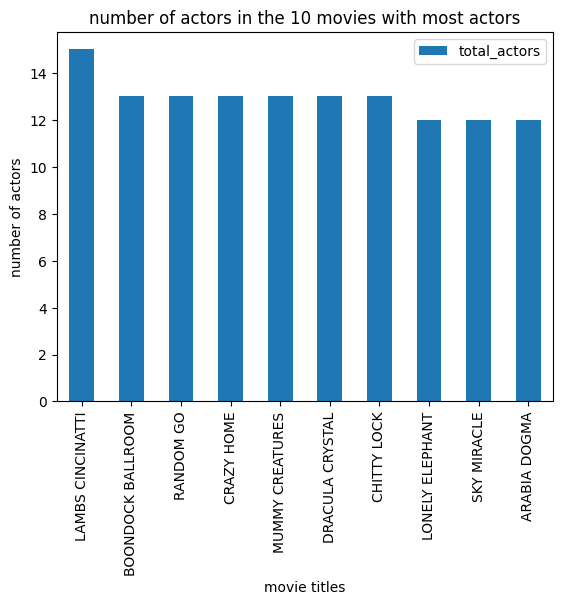

In [143]:
ax = total_actors.head(10).plot(
    x="title",
    y="total_actors",
    kind="bar",
    xlabel="movie titles",
    ylabel="number of actors",
    title = "number of actors in the 10 movies with most actors"
)

# instance of an Axes class
type(ax)

In [145]:
fig = ax.get_figure()
fig.tight_layout()
fig.savefig("actor_count_bar.png", dpi=150)

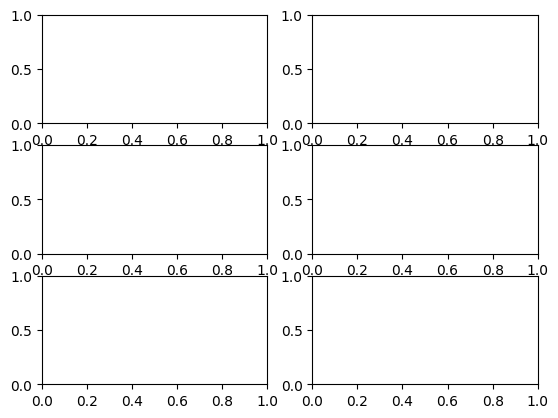

In [147]:
import matplotlib.pyplot as plt

fig.fx = plt.subplots(3,2)

In [148]:
df = total_actors.head(10)
df

,total_actors,title
0,15,LAMBS CINCINATTI
1,13,BOONDOCK BALLROOM
2,13,RANDOM GO
3,13,CRAZY HOME
4,13,MUMMY CREATURES
5,13,DRACULA CRYSTAL
6,13,CHITTY LOCK
7,12,LONELY ELEPHANT
8,12,SKY MIRACLE
9,12,ARABIA DOGMA


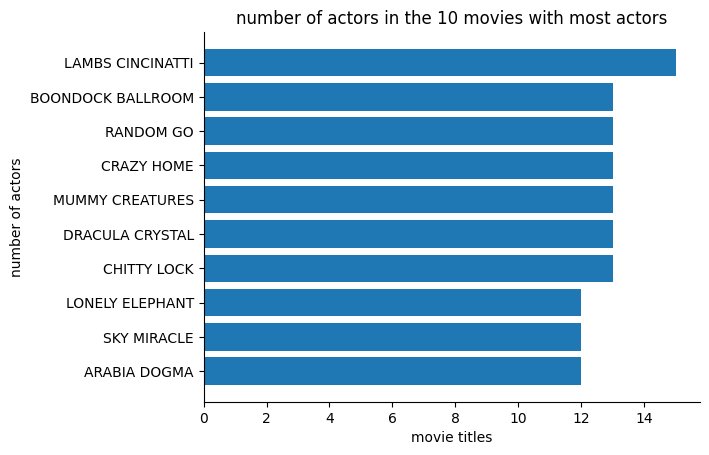

In [155]:
import matplotlib.pyplot as plt

fig, ax= plt.subplots(1)
ax.barh(y=df["title"], width=df["total_actors"])
ax.invert_yaxis()
ax.set(
    xlabel="movie titles",
    ylabel="number of actors",
    title="number of actors in the 10 movies with most actors",)
ax.spines[['right', 'top']].set_visible(False)